<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/naver_map_store_review_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 지도 영업점 리뷰 스크래핑

## Selenium,웹 드라이버 및 필요 패키지 설치

In [1]:
!pip install Selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox') # 눈에 보이게 띄우지 않아도 되게끔
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 979 kB 5.0 MB/s 
     |████████████████████████████████| 138 kB 39.7 MB/s 
     |████████████████████████████████| 359 kB 46.7 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 4.0 MB 40.6 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-

In [2]:
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd

## 한글 폰트 설정

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family ='NanumBarunGothic')
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 47 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155755 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치


In [4]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x
from konlpy.tag import Mecab

+ pip install konlpy
     |████████████████████████████████| 19.4 MB 9.1 MB/s 
     |████████████████████████████████| 453 kB 50.1 MB/s 
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETTY_NAME="Ubuntu 18.04.5 LTS"
/etc/os-release:HOME_URL="https://www.ubuntu.com/"
/

## 리뷰 스크래핑

In [5]:
url = 'https://pcmap.place.naver.com/restaurant/35563923/review/visitor?reviewSort=recent'

wd = webdriver.Chrome('chromedriver', options=chrome_options)
wd.get(url)

writer_list = []
review_list = []
date_list = []


while True:
  try:
    wd.find_element_by_xpath('//*[@id="app-root"]/div/div/div/div[7]/div[2]/div[3]/div[2]/a').click()
    time.sleep(1)

  except NoSuchElementException:
    break


writers = wd.find_elements_by_class_name('_16RxQ')
writer_list += [writer.text for writer in writers]

reviews = wd.find_elements_by_class_name('WoYOw')
review_list += [review.text for review in reviews]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead


In [6]:
review_df = pd.DataFrame({'review':review_list})

In [7]:
review_df

,review
0,굿
1,분위기 좋아요
2,치킨 존맛
3,수제맥주 다양하고 맛있어요 바 내부 좌석 & 야외 좌석 있어요 요즘 날씨는 야외가 ...
4,다른 곳은 노래사운드가너무 커서 대화하기 불편한데 여기는 사운드도 적당해서 좋아요.
5,맛있어요 굳
6,수제 맥주치고 괜찮음 자리는 걍 조금 불편한데 얘기하긴 좋은 분위기 글고 직원분들 ...
7,여기가 이태원 요 거리 중에서는 제일 괜찮습니다! 밖에 테이블도 있고 담배냄새도 안...
8,매장은 작은 편이고 자리가 그렇게 편하진 않지만 맥주 다양하고 맛있어요
9,굿


## 워드 클라우드

In [8]:
' '.join(review_df['review'])

'굿 분위기 좋아요 치킨 존맛 수제맥주 다양하고 맛있어요 바 내부 좌석 & 야외 좌석 있어요 요즘 날씨는 야외가 상석인듯 합니다만 자리가 없어 실내에 자리잡고~ ㅎ 음악 볼륨이 대화하기 좋을정도고요 간단하게 마시기 좋고 편하게 분위기 내기 좋네요 다른 곳은 노래사운드가너무 커서 대화하기 불편한데 여기는 사운드도 적당해서 좋아요. 맛있어요 굳 수제 맥주치고 괜찮음 자리는 걍 조금 불편한데 얘기하긴 좋은 분위기 글고 직원분들 친절해요 여기가 이태원 요 거리 중에서는 제일 괜찮습니다! 밖에 테이블도 있고 담배냄새도 안 나고 노래 소리도 다른 매장들처럼 너무 안 크고 치킨도 반마리 있어서 배부를 때 시키기 딱 좋고 친절하십니다! 친구한테도 추천 완료 매장은 작은 편이고 자리가 그렇게 편하진 않지만 맥주 다양하고 맛있어요 굿 굿 간만에 이태원~~ 좋아요! :) 이태원가고싶다 직원분들 웃으면서 응대해주시거 요청사항 잘 들어주시구 음식도 술도 추천해주시고 좋아요 ㅎㅎ번창하세요~~🕊\U0001f90d 콥딥, 크리스피 반마리 최고의 조합! 맛나요 분위기도 좋고 맛있어요^^ 분위기 좋아요 ㅎㅎ 굿 간만에 이태원~~ 좋아요! :) 이태원가고싶다 직원분들 웃으면서 응대해주시거 요청사항 잘 들어주시구 음식도 술도 추천해주시고 좋아요 ㅎㅎ번창하세요~~🕊\U0001f90d 콥딥, 크리스피 반마리 최고의 조합! 맛나요 분위기도 좋고 맛있어요^^ 분위기 좋아요 ㅎㅎ 좋아요 굿굿 매너가 너무너무 없으신 사장님...... 다시는 안가요... 맛있었어욘!! 야외에 시원한 바람 맞으며 먹는 맥주는 진리죠~ 좀더 맥주가 시원했음 좋겠고 가방이나 옷 걸어두는 보관함이 좀더 나아졌음 좋겠네요. 맥주 너무 맛있어요 분위기랑 인테리어 좋습니다 내 최애 맥주집 ㅠ 가보세용 어제 알바분도 처음 일 하신데요 ㅋㅋㅋ 귀여워요 맥주가 맛잇는 집 맥주가 맛있어요 가볍게 한잔하기 좋아요 좋아요 굿굿 매너가 너무너무 없으신 사장님...... 다시는 안가요... 맛있었어욘!! 야외에 시원한 바람 맞으며 먹는 맥주는 진리죠

In [9]:
plt.rc('font', family='NanumGothicOTF') # For MacOS, Server컴 
print(plt.rcParams['font.family'])

['NanumGothicOTF']


In [10]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS


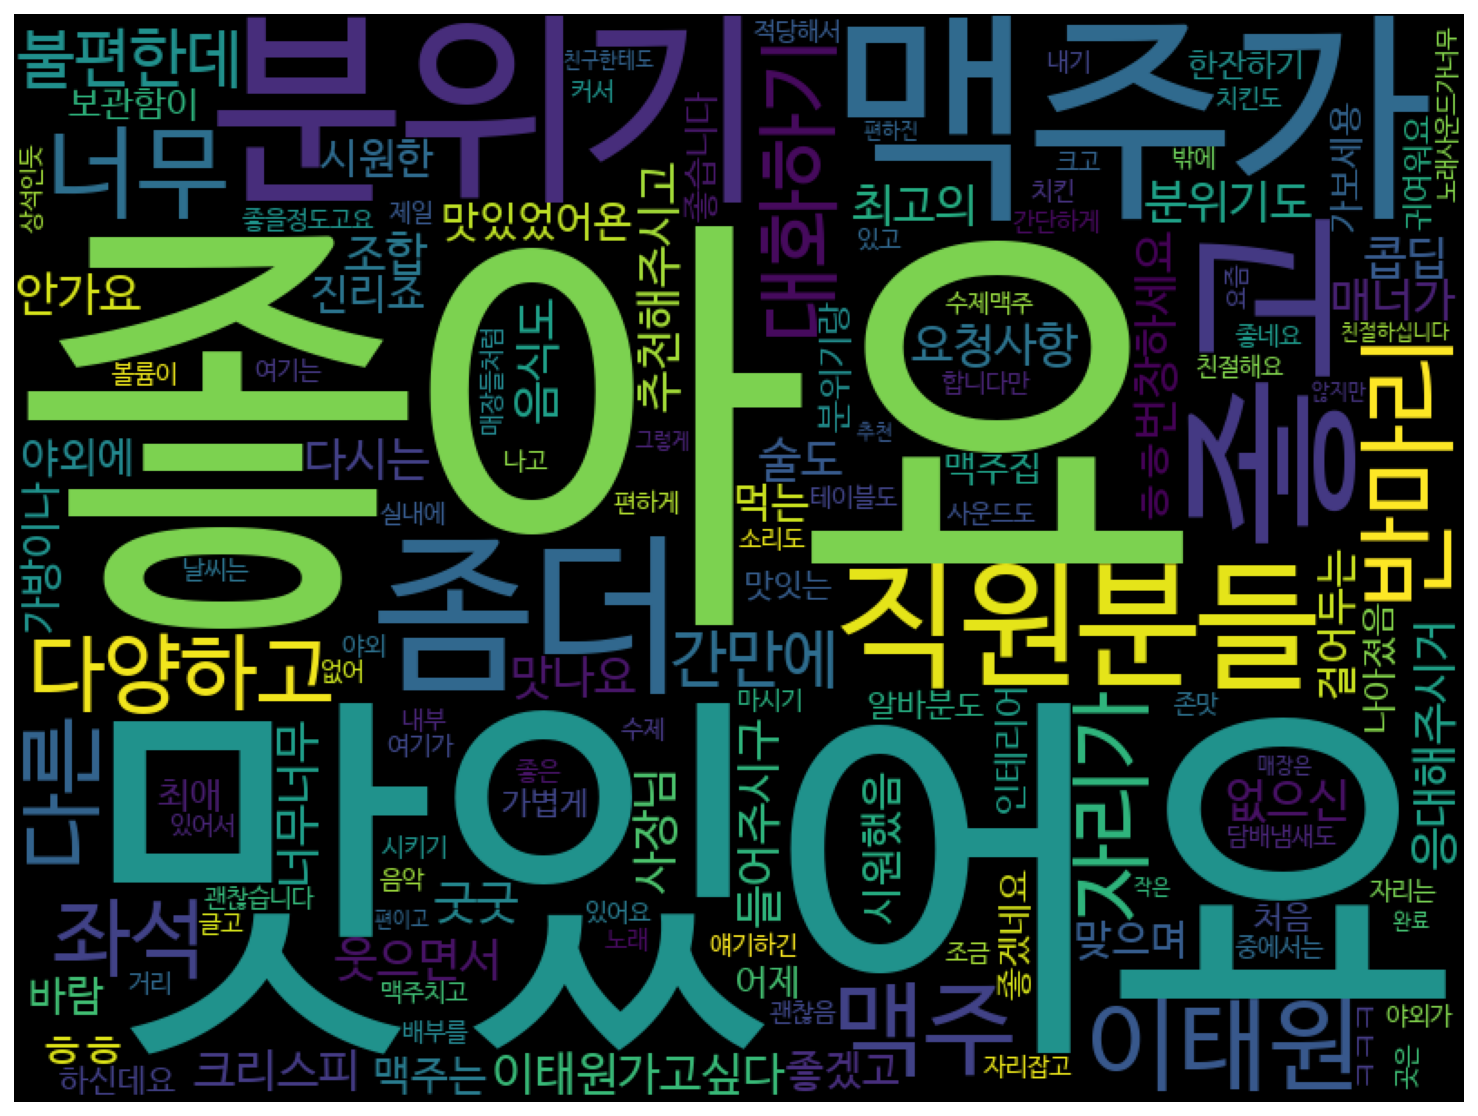

In [11]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color='black',
                      font_path = fontpath,
                      width=800,
                      height=600).generate(' '.join(review_df['review']))

plt.figure(figsize = (15, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## 키워드 분석

명사만을 이용해 키워드 분석을 실시합니다

In [12]:
tagger = Mecab()

nouns = []
for review in review_list:
  for noun in tagger.nouns(review):
    nouns.append(noun)

nouns[:10]

['굿', '분위기', '치킨', '존', '맛', '수제', '맥주', '다양', '바', '내부']

### 불용어(Stopwords) 사전 만들기
- 형태소 분석을 통해 조사, 접속사 등의 제거 가능
- 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
- 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
- 불용어 예: 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것
- 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: 맥주)


In [13]:
stop_words = "맥주 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(' ')
print(stop_words)

['맥주', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


###불용어를 제외하여 형태소 분석 수행
한글 텍스트에 대해서 형태소 분석 수행
분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장


In [14]:
nouns = []
for review in review_list:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)

nouns[:10]

['굿', '분위기', '치킨', '존', '맛', '수제', '다양', '바', '내부', '좌석']

### 단어 빈도수 측정
- 단어 빈도수 측정에는 collections 라이브러리의 Counter 함수를 이용
- collections 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
- counter를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능


In [15]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'가방': 2,
 '굿': 8,
 '내부': 1,
 '노래': 2,
 '다양': 2,
 '대화': 2,
 '딥': 2,
 '마리': 3,
 '맛': 3,
 '매너': 2,
 '매장': 2,
 '바': 1,
 '바람': 2,
 '반': 2,
 '번창': 2,
 '보관함': 2,
 '분도': 2,
 '분위기': 9,
 '불편': 2,
 '사운드': 2,
 '사장': 2,
 '사항': 2,
 '수제': 2,
 '술': 2,
 '알바': 2,
 '야외': 4,
 '여기': 2,
 '옷': 2,
 '요청': 2,
 '욘': 2,
 '음식': 2,
 '응대': 2,
 '이태원': 5,
 '인테리어': 2,
 '자리': 4,
 '조합': 2,
 '존': 1,
 '좌석': 2,
 '직원': 3,
 '진리': 2,
 '집': 4,
 '처음': 2,
 '최고': 2,
 '최애': 2,
 '추천': 3,
 '치킨': 2,
 '친절': 2,
 '콥': 2,
 '크리스피': 2,
 '한잔': 2}

### 키워드 워드클라우드

In [17]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)


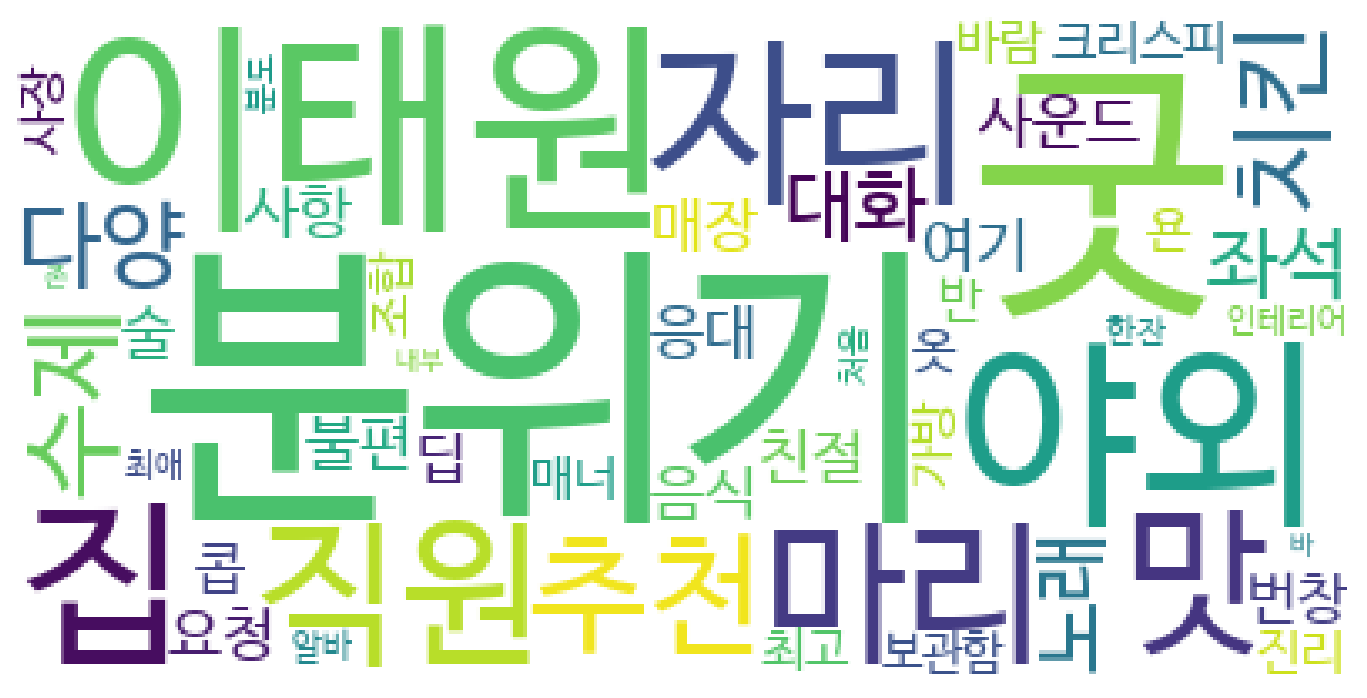

In [18]:
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()
